In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import requests

# SerpAPI Configuration
SERPAPI_KEY = "e08797ee6e7729658fa9713c67095463af68aea4227b0d388f5f2947ba8aaaae"

def search_with_serpapi(query):
    """ Fetch search results using SerpAPI """
    url = "https://serpapi.com/search"
    params = {
        "q": query,
        "hl": "en",
        "gl": "us",
        "api_key": SERPAPI_KEY
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    results = []
    if "organic_results" in data:
        for res in data["organic_results"]:
            title = res.get("title", "N/A")
            link = res.get("link", "N/A")
            results.append((title, link))
    
    return results

def search_with_selenium(query, num_results=10):
    """ Fetch search results using Selenium & BeautifulSoup """
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")  # Run in headless mode
    driver = webdriver.Chrome(options=options)

    driver.get("https://www.google.com/")
    search_box = driver.find_element("name", "q")
    search_box.send_keys(query)
    search_box.send_keys(Keys.RETURN)

    time.sleep(2)  # Wait for results to load

    soup = BeautifulSoup(driver.page_source, "html.parser")
    results = []
    
    for g in soup.find_all('div', class_='tF2Cxc')[:num_results]:
        title = g.find('h3').text if g.find('h3') else "No Title"
        link = g.find('a')['href'] if g.find('a') else "No Link"
        results.append((title, link))

    driver.quit()
    return results

# Example Query
query = "cybersecurity threats 2025"

print("\n🔍 Searching with SerpAPI...")
serpapi_results = search_with_serpapi(query)
for idx, (title, link) in enumerate(serpapi_results, 1):
    print(f"{idx}. {title}\n{link}\n")

print("\n🕵️ Searching with Selenium + BeautifulSoup...")
selenium_results = search_with_selenium(query)
for idx, (title, link) in enumerate(selenium_results, 1):
    print(f"{idx}. {title}\n{link}\n")



🔍 Searching with SerpAPI...
1. Global Cybersecurity Outlook 2025
https://www.weforum.org/publications/global-cybersecurity-outlook-2025/

2. Top Cybersecurity Threats [2025]
https://onlinedegrees.sandiego.edu/top-cyber-security-threats/

3. 2025 Global Threat Report | Latest Cybersecurity Trends & ...
https://www.crowdstrike.com/en-us/global-threat-report/

4. 10 Cyber Security Trends For 2025
https://www.sentinelone.com/cybersecurity-101/cybersecurity/cyber-security-trends/

5. 10 common cybersecurity threats and attacks: 2025 update
https://www.connectwise.com/blog/cybersecurity/common-threats-and-attacks

6. The cyber threats to watch in 2025, and other cybersecurity ...
https://www.weforum.org/stories/2025/02/biggest-cybersecurity-threats-2025/

7. Cyber Security Report 2025
https://www.checkpoint.com/security-report/


🕵️ Searching with Selenium + BeautifulSoup...


In [2]:
import re
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from joblib import load
import requests

# 🚨 Load Pretrained Malicious URL Model (You Can Train One)
try:
    malicious_model = load("malicious_url_model.joblib")  # Load ML model if available
except:
    malicious_model = None  # Model not found

def is_malicious_url(url):
    """ Simple Heuristic & ML Model to Detect Malicious URLs """
    if "https" not in url or any(keyword in url.lower() for keyword in ["hack", "phish", "scam"]):
        return True
    if malicious_model:
        vectorizer = CountVectorizer()
        return malicious_model.predict(vectorizer.transform([url]))[0] == 1
    return False

def analyze_sentiment(text):
    """ Perform Sentiment Analysis """
    return TextBlob(text).sentiment.polarity  # -1 (negative) to 1 (positive)

def process_results(results):
    """ Process Search Results with AI-Based Risk Analysis """
    processed_results = []
    
    for title, link in results:
        risk_level = "Malicious" if is_malicious_url(link) else "Safe"
        sentiment_score = analyze_sentiment(title)
        sentiment_label = "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"

        processed_results.append({
            "Title": title,
            "URL": link,
            "Risk Level": risk_level,
            "Sentiment": sentiment_label
        })
    
    return processed_results

# ✅ Fetch Search Results
query = "latest cybersecurity threats 2025"
serpapi_results = search_with_serpapi(query)
selenium_results = search_with_selenium(query)

# ✅ Combine Results & Process with AI
final_results = process_results(serpapi_results + selenium_results)

# ✅ Save to CSV
df = pd.DataFrame(final_results)
df.to_csv("search_results_analysis.csv", index=False)

# ✅ Display Processed Results
print(df)


                                               Title  \
0                  10 Cyber Security Trends For 2025   
1  The cyber threats to watch in 2025, and other ...   
2  2025 Global Threat Report | Latest Cybersecuri...   
3                   Top Cybersecurity Threats [2025]   
4  9 major cyber attacks & data breaches in Febru...   
5                  Global Cybersecurity Outlook 2025   
6  What Are the Top Cybersecurity Threats of 2025...   
7  January 2025: Recent Cyber Attacks, Data Breac...   

                                                 URL Risk Level Sentiment  
0  https://www.sentinelone.com/cybersecurity-101/...       Safe   Neutral  
1  https://www.weforum.org/stories/2025/02/bigges...       Safe  Negative  
2  https://www.crowdstrike.com/en-us/global-threa...       Safe  Positive  
3  https://onlinedegrees.sandiego.edu/top-cyber-s...       Safe  Positive  
4  https://www.cshub.com/attacks/articles/cyber-a...       Safe  Positive  
5  https://www.weforum.org/publications

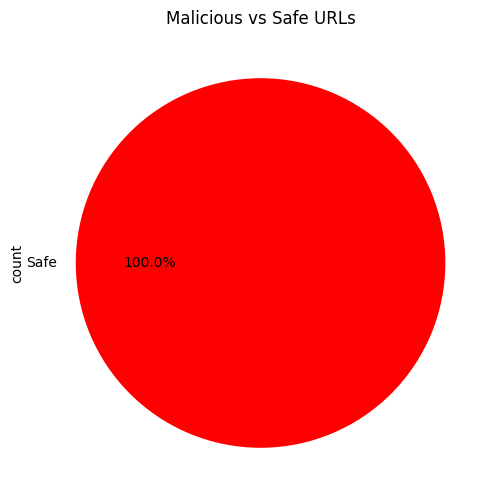

C:\Users\surya\AppData\Local\Temp\ipykernel_16896\2411854343.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="coolwarm")


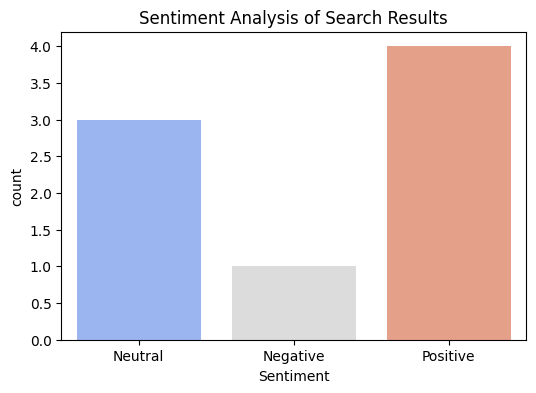

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_data():
    """Plot Risk Levels and Sentiment Distribution"""
    df = pd.read_csv("search_results_analysis.csv")

    # 🎯 Risk Level Pie Chart
    plt.figure(figsize=(6, 6))
    df["Risk Level"].value_counts().plot.pie(autopct='%1.1f%%', colors=["red", "green"])
    plt.title("Malicious vs Safe URLs")
    plt.show()

    # 🎯 Sentiment Analysis Bar Chart
    plt.figure(figsize=(6, 4))
    sns.countplot(x="Sentiment", data=df, palette="coolwarm")
    plt.title("Sentiment Analysis of Search Results")
    plt.show()

visualize_data()


In [4]:
import requests
import threading
from bs4 import BeautifulSoup

def fetch_google_results(query):
    url = f"https://www.google.com/search?q={query}"
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        results = [h3.get_text() for h3 in soup.find_all("h3")][:5]
        return results
    return []

def threaded_search(queries):
    threads = []
    results = {}

    for query in queries:
        thread = threading.Thread(target=lambda q, r: r.update({q: fetch_google_results(q)}), args=(query, results))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    return results

# 🎯 Test Multiple Queries
queries = ["latest cybersecurity threats", "AI in cybersecurity", "phishing attack prevention"]
search_results = threaded_search(queries)

for query, results in search_results.items():
    print(f"\n🔍 Results for: {query}")
    for res in results:
        print(f"- {res}")



🔍 Results for: phishing attack prevention

🔍 Results for: latest cybersecurity threats

🔍 Results for: AI in cybersecurity


In [5]:
import requests

API_KEY = "9c7fcc9fb15679dc6525c6c820887f4d8396171c11cdf3a8b181dbea05b08616"

def check_url_safety(url):
    headers = {"x-apikey": API_KEY}
    response = requests.get(f"https://www.virustotal.com/api/v3/urls/{url}", headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        positives = data["data"]["attributes"]["last_analysis_stats"]["malicious"]
        return "Malicious" if positives > 0 else "Safe"
    return "Unknown"

# 🎯 Test URL Safety
print(check_url_safety("https://www.wikipedia.org/"))


Unknown


In [6]:
import requests
import base64

API_KEY = "9c7fcc9fb15679dc6525c6c820887f4d8396171c11cdf3a8b181dbea05b08616"

def check_url_safety(url):
    encoded_url = base64.urlsafe_b64encode(url.encode()).decode().strip("=")
    headers = {"x-apikey": API_KEY}
    
    response = requests.get(f"https://www.virustotal.com/api/v3/urls/{encoded_url}", headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        positives = data["data"]["attributes"]["last_analysis_stats"]["malicious"]
        return "Malicious" if positives > 0 else "Safe"
    return "Unknown"

# 🎯 Test URL Safety
print(check_url_safety("https://www.wikipedia.org/"))


Safe



🔍 Analyzing URL: 

📊 Visualization of Results:


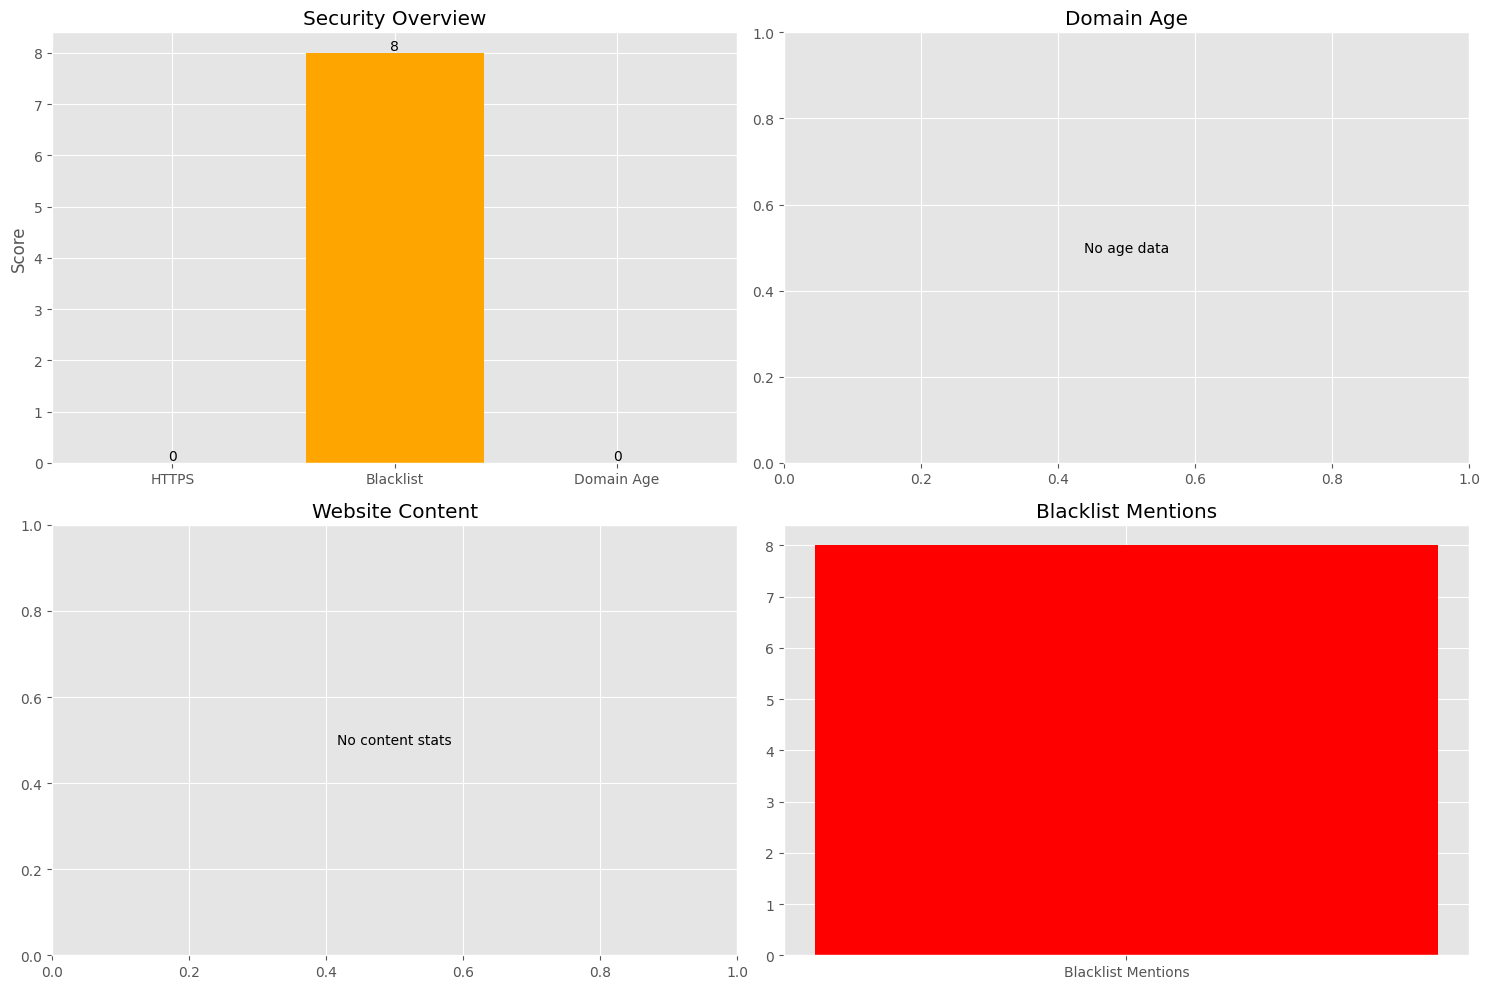


📝 Detailed Report:


In [7]:
import requests
import whois
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('ggplot')
sns.set_palette("Set2")

# Replace with your actual SerpAPI key
SERP_API_KEY = "e08797ee6e7729658fa9713c67095463af68aea4227b0d388f5f2947ba8aaaae"

def check_serpapi_blacklist(url):
    """Check if the URL appears in scam/malware reports using SerpAPI."""
    try:
        domain = urlparse(url).netloc
        query = f"site:{domain} scam OR malware OR phishing OR blacklist OR fraud"
        params = {"engine": "google", "q": query, "api_key": SERP_API_KEY}
        
        response = requests.get("https://serpapi.com/search", params=params, timeout=10)
        response.raise_for_status()  

        data = response.json()
        if "organic_results" in data and len(data["organic_results"]) > 0:
            return {
                "status": "warning",
                "message": "⚠️ Warning: This site appears in scam-related search results!",
                "details": [result['link'] for result in data['organic_results'][:3]],
                "count": len(data['organic_results'])
            }
        return {
            "status": "safe",
            "message": "✅ Safe: No scam-related results found.",
            "details": [],
            "count": 0
        }
    except Exception as e:
        return {
            "status": "error",
            "message": f"❌ Error in SerpAPI check: {e}",
            "details": [],
            "count": 0
        }

def get_domain_age(url):
    """Get domain registration age using WHOIS lookup."""
    try:
        domain = urlparse(url).netloc
        domain_info = whois.whois(domain)

        creation_date = domain_info.creation_date
        if isinstance(creation_date, list):
            creation_date = creation_date[0]

        age_days = (pd.Timestamp.now() - pd.to_datetime(creation_date)).days
        age_years = age_days / 365.25
        
        return {
            "status": "success",
            "message": f"📅 Domain Age: {creation_date.strftime('%Y-%m-%d')}",
            "age_days": age_days,
            "age_years": age_years,
            "details": {
                "registrar": domain_info.registrar,
                "expiration_date": domain_info.expiration_date
            }
        }
    except Exception as e:
        return {
            "status": "error",
            "message": f"❌ Error fetching WHOIS data: {e}",
            "age_days": None,
            "age_years": None,
            "details": {}
        }

def check_https(url):
    """Check if the website is secure using HTTPS."""
    is_secure = url.startswith("https://")
    return {
        "status": "secure" if is_secure else "insecure",
        "message": "✅ Secure (Uses HTTPS)" if is_secure else "⚠️ Insecure (Uses HTTP)",
        "protocol": "HTTPS" if is_secure else "HTTP"
    }

def scrape_website(url):
    """Extract website title & meta description using BeautifulSoup."""
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()  

        soup = BeautifulSoup(response.text, "html.parser")
        
        title = soup.title.string if soup.title else "No title found"
        description_tag = soup.find("meta", attrs={"name": "description"})
        description = description_tag["content"] if description_tag else "No description found"

        # Count important elements
        links = len(soup.find_all('a'))
        images = len(soup.find_all('img'))
        scripts = len(soup.find_all('script'))
        
        return {
            "status": "success",
            "message": "✅ Website scraped successfully",
            "title": title,
            "description": description,
            "stats": {
                "links": links,
                "images": images,
                "scripts": scripts
            }
        }
    except Exception as e:
        return {
            "status": "error",
            "message": f"❌ Error scraping website: {e}",
            "title": "",
            "description": "",
            "stats": {}
        }

def visualize_results(results):
    """Create visualizations for the analysis results."""
    # Create a figure with multiple subplots
    plt.figure(figsize=(15, 10))
    
    # Security Overview
    plt.subplot(2, 2, 1)
    security_data = {
        'HTTPS': 1 if results['https']['status'] == 'secure' else 0,
        'Blacklist': results['blacklist']['count'],
        'Domain Age': min(results['domain_age']['age_years'] or 0, 20)  # Cap at 20 for visualization
    }
    bars = plt.bar(security_data.keys(), security_data.values(), color=['green', 'orange', 'blue'])
    plt.title('Security Overview')
    plt.ylabel('Score')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}' if isinstance(height, float) else str(height),
                 ha='center', va='bottom')
    
    # Domain Age Visualization
    plt.subplot(2, 2, 2)
    if results['domain_age']['age_years']:
        age_data = {'Years': results['domain_age']['age_years']}
        plt.pie(age_data.values(), labels=age_data.keys(), autopct='%1.1f%%',
                colors=['lightblue'], startangle=90)
        plt.title(f'Domain Age: {results["domain_age"]["age_years"]:.1f} years')
    else:
        plt.text(0.5, 0.5, 'No age data', ha='center', va='center')
        plt.title('Domain Age')
    
    # Website Content Stats
    plt.subplot(2, 2, 3)
    if results['scrape']['stats']:
        stats = results['scrape']['stats']
        plt.barh(['Links', 'Images', 'Scripts'], [stats['links'], stats['images'], stats['scripts']])
        plt.title('Website Content Statistics')
    else:
        plt.text(0.5, 0.5, 'No content stats', ha='center', va='center')
        plt.title('Website Content')
    
    # Blacklist Results
    plt.subplot(2, 2, 4)
    if results['blacklist']['count'] > 0:
        plt.bar(['Blacklist Mentions'], [results['blacklist']['count']], color='red')
        plt.title('Blacklist Mentions')
    else:
        plt.text(0.5, 0.5, 'No blacklist mentions', ha='center', va='center')
        plt.title('Blacklist Status')
    
    plt.tight_layout()
    plt.show()

def create_html_report(results):
    """Generate an HTML report of the findings."""
    report = f"""
    <html>
    <head>
        <title>URL Security Report</title>
        <style>
            body {{ font-family: Arial, sans-serif; line-height: 1.6; }}
            .container {{ max-width: 900px; margin: 0 auto; padding: 20px; }}
            .header {{ background-color: #f8f9fa; padding: 20px; border-radius: 5px; margin-bottom: 20px; }}
            .result-card {{ border-left: 4px solid; padding: 15px; margin-bottom: 15px; border-radius: 0 5px 5px 0; }}
            .safe {{ border-color: #28a745; background-color: #e8f5e9; }}
            .warning {{ border-color: #ffc107; background-color: #fff8e1; }}
            .danger {{ border-color: #dc3545; background-color: #ffebee; }}
            .info {{ border-color: #17a2b8; background-color: #e3f2fd; }}
            .details {{ margin-top: 10px; padding: 10px; background-color: white; border-radius: 3px; }}
            h1, h2 {{ color: #343a40; }}
        </style>
    </head>
    <body>
        <div class="container">
            <div class="header">
                <h1>URL Security Analysis Report</h1>
                <p>Analyzed URL: <strong>{results['url']}</strong></p>
                <p>Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}</p>
            </div>
            
            <h2>Security Assessment</h2>
            
            <div class="result-card {results['https']['status']}">
                <h3>HTTPS Check</h3>
                <p>{results['https']['message']}</p>
            </div>
            
            <div class="result-card {'warning' if results['blacklist']['count'] > 0 else 'safe'}">
                <h3>Blacklist Check</h3>
                <p>{results['blacklist']['message']}</p>
                {f"<div class='details'><strong>Top mentions:</strong><ul>{''.join([f'<li><a href="{link}" target="_blank">{link}</a></li>' for link in results['blacklist']['details'][:3]])}</ul></div>" if results['blacklist']['count'] > 0 else ''}
            </div>
            
            <div class="result-card {'info' if results['domain_age']['status'] == 'success' else 'warning'}">
                <h3>Domain Information</h3>
                <p>{results['domain_age']['message']}</p>
                {f"<div class='details'><p><strong>Registrar:</strong> {results['domain_age']['details']['registrar']}</p><p><strong>Domain Age:</strong> {results['domain_age']['age_years']:.1f} years</p></div>" if results['domain_age']['status'] == 'success' else ''}
            </div>
            
            <h2>Website Content</h2>
            
            <div class="result-card info">
                <h3>Page Information</h3>
                <p><strong>Title:</strong> {results['scrape']['title']}</p>
                <p><strong>Description:</strong> {results['scrape']['description']}</p>
                <div class="details">
                    <p><strong>Content Statistics:</strong></p>
                    <ul>
                        <li>Links: {results['scrape']['stats'].get('links', 'N/A')}</li>
                        <li>Images: {results['scrape']['stats'].get('images', 'N/A')}</li>
                        <li>Scripts: {results['scrape']['stats'].get('scripts', 'N/A')}</li>
                    </ul>
                </div>
            </div>
        </div>
    </body>
    </html>
    """
    return report

def analyze_url(url):
    """Perform full security and info analysis of the given URL."""
    print(f"\n🔍 Analyzing URL: {url}")
    
    results = {
        "url": url,
        "https": check_https(url),
        "blacklist": check_serpapi_blacklist(url),
        "domain_age": get_domain_age(url),
        "scrape": scrape_website(url)
    }
    
    # Display visualizations
    print("\n📊 Visualization of Results:")
    visualize_results(results)
    
    # Display detailed text report
    print("\n📝 Detailed Report:")
    display(HTML(create_html_report(results)))
    
    return results

# Example usage in Jupyter Notebook
if __name__ == "__main__":
    # This will work in Jupyter Notebook
    user_url = input("Enter the URL to analyze: ")
    analysis_results = analyze_url(user_url)

In [8]:
def analyze_url(user_url):
    results = {}

    # Existing checks
    results["VirusTotal"] = check_virustotal(user_url)
    results["SERP"] = check_serpapi(user_url)

    # New AI-based Feature Extraction
    results["AI Features"] = extract_ai_features(user_url)

    return results
